In [1]:
from models.bert_probe import BertLayerProbe

probe = BertLayerProbe()

sentence = "The cat is sleeping."
cls_vectors = probe.get_cls_per_layer(sentence)

print("Number of layers:", len(cls_vectors))
print("Shape of one CLS vector:", cls_vectors[0].shape)

ModuleNotFoundError: No module named 'models'

In [2]:
import sys
import os

project_root = os.path.abspath(r"C:\Users\hp\Desktop\bert_layerwise_negation")
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from models.bert_probe import BertLayerProbe

In [4]:
probe = BertLayerProbe()

sentence = "The cat is sleeping."
cls_vectors = probe.get_cls_per_layer(sentence)

print("Number of layers:", len(cls_vectors))
print("Shape of one CLS vector:", cls_vectors[0].shape)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\hp\anaconda3\envs\nlp_course\lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hp\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: bert-base-uncased
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
cls.predictions.transform.dense.weight     | UNEXPECTED |  | 
cls.seq_relationship.weight                | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED |  | 
cls.predictions.bias                       | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED |  | 
cls.seq_relationship.bias                  | UNEXPECTED |  | 
cls.predictions.transform.dense.bias       | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Number of layers: 13
Shape of one CLS vector: torch.Size([1, 768])


## testing cosine similarity (layer wise):

In [51]:

from utils.metrics import cosine_similarity

probe = BertLayerProbe()

s1 = "he is happy."
s2 = "he is not unhappy."

cls1 = probe.get_cls_per_layer(s1)
cls2 = probe.get_cls_per_layer(s2)

similarities = []

for i in range(len(cls1)):
    sim = cosine_similarity(cls1[i], cls2[i])
    similarities.append(sim)
    print(f"Layer {i}: {sim:.4f}")

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: bert-base-uncased
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
cls.predictions.transform.dense.weight     | UNEXPECTED |  | 
cls.seq_relationship.weight                | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED |  | 
cls.predictions.bias                       | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED |  | 
cls.seq_relationship.bias                  | UNEXPECTED |  | 
cls.predictions.transform.dense.bias       | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Layer 0: 1.0000
Layer 1: 0.9958
Layer 2: 0.9951
Layer 3: 0.9960
Layer 4: 0.9951
Layer 5: 0.9900
Layer 6: 0.9824
Layer 7: 0.9435
Layer 8: 0.9548
Layer 9: 0.9229
Layer 10: 0.9246
Layer 11: 0.8994
Layer 12: 0.9347


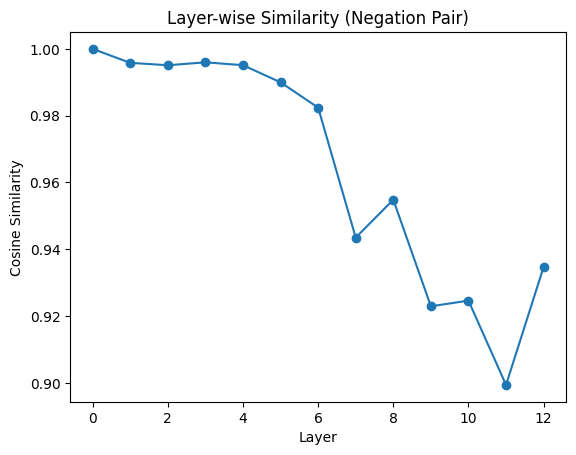

In [52]:
import matplotlib.pyplot as plt

plt.plot(range(13), similarities, marker='o')
plt.xlabel("Layer")
plt.ylabel("Cosine Similarity")
plt.title("Layer-wise Similarity (Negation Pair)")
plt.show()

## cosine similarity for negation:

In [25]:
import json

with open(r"C:\Users\hp\Desktop\bert_layerwise_negation\data\sentence_pairs.json", "r") as f:
    pairs = json.load(f)

negation_similarities = []

for pair in pairs:
    cls1 = probe.get_cls_per_layer(pair["sentence1"])
    cls2 = probe.get_cls_per_layer(pair["sentence2"])
    
    layer_sims = []
    for i in range(len(cls1)):
        sim = cosine_similarity(cls1[i], cls2[i])
        layer_sims.append(sim)
    
    negation_similarities.append(layer_sims)

In [26]:
import numpy as np

negation_similarities = np.array(negation_similarities)
negation_mean_similarities = negation_similarities.mean(axis=0)

for i, sim in enumerate(negation_mean_similarities):
    print(f"Layer {i}: {sim:.4f}")

Layer 0: 1.0000
Layer 1: 0.9965
Layer 2: 0.9967
Layer 3: 0.9970
Layer 4: 0.9968
Layer 5: 0.9945
Layer 6: 0.9873
Layer 7: 0.9693
Layer 8: 0.9660
Layer 9: 0.9326
Layer 10: 0.9243
Layer 11: 0.9111
Layer 12: 0.9581


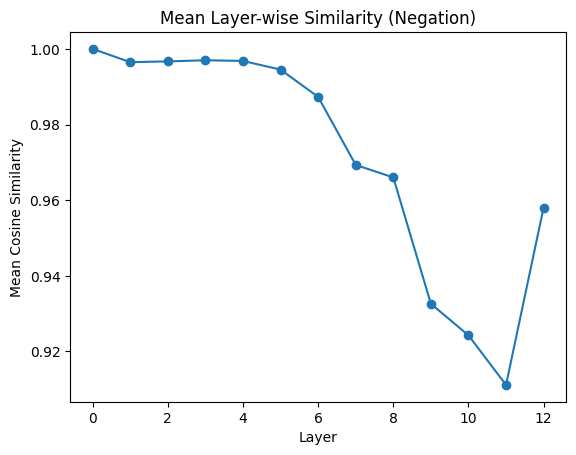

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(13), negation_mean_similarities, marker='o')
plt.xlabel("Layer")
plt.ylabel("Mean Cosine Similarity")
plt.title("Mean Layer-wise Similarity (Negation)")
plt.show()

## exact pair cosine similarity:

In [21]:
import json

with open(r"C:\Users\hp\Desktop\bert_layerwise_negation\data\exact_pairs.json", "r") as f:
    pairs = json.load(f)

exact_pair_similarities = []

for pair in pairs:
    cls1 = probe.get_cls_per_layer(pair["sentence1"])
    cls2 = probe.get_cls_per_layer(pair["sentence2"])
    
    layer_sims = []
    for i in range(len(cls1)):
        sim = cosine_similarity(cls1[i], cls2[i])
        layer_sims.append(sim)
    
    exact_pair_similarities.append(layer_sims)

In [22]:
import numpy as np

exact_pair_similarities = np.array(exact_pair_similarities)
exact_pair_mean_similarities = exact_pair_similarities.mean(axis=0)

for i, sim in enumerate(exact_pair_mean_similarities):
    print(f"Layer {i}: {sim:.4f}")

Layer 0: 1.0000
Layer 1: 1.0000
Layer 2: 1.0000
Layer 3: 1.0000
Layer 4: 1.0000
Layer 5: 1.0000
Layer 6: 1.0000
Layer 7: 1.0000
Layer 8: 1.0000
Layer 9: 1.0000
Layer 10: 1.0000
Layer 11: 1.0000
Layer 12: 1.0000


## standard deviation for negation category


In [28]:
negation_std_similarities = negation_similarities.std(axis=0)

for i, std in enumerate(negation_std_similarities):
    print(f"Layer {i} STD: {std:.4f}")

Layer 0 STD: 0.0000
Layer 1 STD: 0.0010
Layer 2 STD: 0.0013
Layer 3 STD: 0.0010
Layer 4 STD: 0.0010
Layer 5 STD: 0.0033
Layer 6 STD: 0.0075
Layer 7 STD: 0.0178
Layer 8 STD: 0.0185
Layer 9 STD: 0.0356
Layer 10 STD: 0.0352
Layer 11 STD: 0.0406
Layer 12 STD: 0.0172


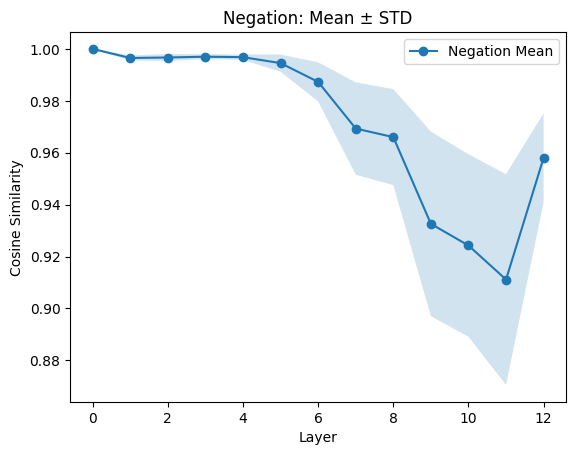

In [30]:
plt.figure()
plt.plot(range(13), negation_mean_similarities, marker='o', label="Negation Mean")

plt.fill_between(
    range(13),
    negation_mean_similarities - negation_std_similarities,
    negation_mean_similarities + negation_std_similarities,
    alpha=0.2
)

plt.xlabel("Layer")
plt.ylabel("Cosine Similarity")
plt.title("Negation: Mean ± STD")
plt.legend()
plt.show()

## t-test for exact and negation:

In [31]:
from scipy.stats import ttest_rel
import numpy as np

# exact_similarities shape: (num_pairs, 13)
# negation_similarities shape: (num_pairs, 13)

# Create exact array of 1s (since exact similarity is 1 for each pair)
exact_similarities = np.ones_like(negation_similarities)

t_values = []
p_values = []

for layer in range(13):
    t_stat, p_val = ttest_rel(
        exact_similarities[:, layer],
        negation_similarities[:, layer]
    )
    
    t_values.append(t_stat)
    p_values.append(p_val)

    print(f"Layer {layer}: t = {t_stat:.4f}, p = {p_val:.6f}")

Layer 0: t = -inf, p = 0.000000
Layer 1: t = 10.5987, p = 0.000002
Layer 2: t = 7.5630, p = 0.000035
Layer 3: t = 9.1077, p = 0.000008
Layer 4: t = 9.2586, p = 0.000007
Layer 5: t = 4.9400, p = 0.000802
Layer 6: t = 5.0486, p = 0.000692
Layer 7: t = 5.1710, p = 0.000586
Layer 8: t = 5.5130, p = 0.000374
Layer 9: t = 5.6821, p = 0.000301
Layer 10: t = 6.4625, p = 0.000116
Layer 11: t = 6.5645, p = 0.000103
Layer 12: t = 7.3314, p = 0.000044


c:\Users\hp\anaconda3\envs\nlp_course\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return hypotest_fun_in(*args, **kwds)


## Synonym pairs:

In [32]:
with open(r"C:\Users\hp\Desktop\bert_layerwise_negation\data\synonym_pairs.json", "r") as f:
    synonym_pairs = json.load(f)

In [33]:
synonym_similarities = []

for pair in synonym_pairs:
    cls1 = probe.get_cls_per_layer(pair["sentence1"])
    cls2 = probe.get_cls_per_layer(pair["sentence2"])
    
    layer_sims = []
    for i in range(len(cls1)):
        sim = cosine_similarity(cls1[i], cls2[i])
        layer_sims.append(sim)
    
    synonym_similarities.append(layer_sims)

synonym_similarities = np.array(synonym_similarities)

synonym_mean = synonym_similarities.mean(axis=0)
synonym_std = synonym_similarities.std(axis=0)

for i, sim in enumerate(synonym_mean):
    print(f"Layer {i}: {sim:.4f}")

Layer 0: 1.0000
Layer 1: 0.9996
Layer 2: 0.9990
Layer 3: 0.9991
Layer 4: 0.9978
Layer 5: 0.9965
Layer 6: 0.9943
Layer 7: 0.9851
Layer 8: 0.9847
Layer 9: 0.9759
Layer 10: 0.9738
Layer 11: 0.9660
Layer 12: 0.9815


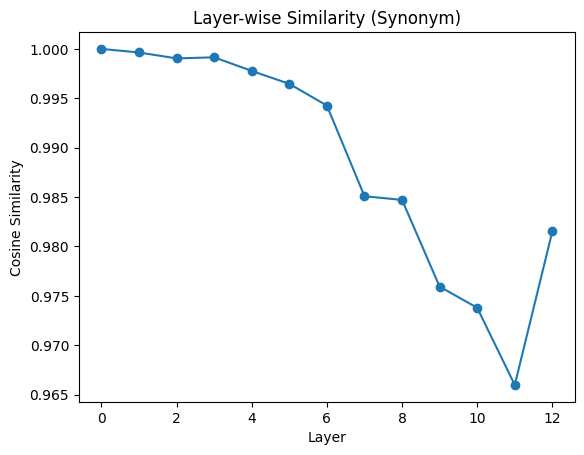

In [34]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(13), synonym_mean, marker='o')
plt.xlabel("Layer")
plt.ylabel("Cosine Similarity")
plt.title("Layer-wise Similarity (Synonym)")
plt.show()

## antonym pairs:

In [36]:
with open(r"C:\Users\hp\Desktop\bert_layerwise_negation\data\antonym_pairs.json", "r") as f:
    synonym_pairs = json.load(f)

In [37]:
antonym_similarities = []

for pair in synonym_pairs:
    cls1 = probe.get_cls_per_layer(pair["sentence1"])
    cls2 = probe.get_cls_per_layer(pair["sentence2"])
    
    layer_sims = []
    for i in range(len(cls1)):
        sim = cosine_similarity(cls1[i], cls2[i])
        layer_sims.append(sim)
    
    antonym_similarities.append(layer_sims)

antonym_similarities = np.array(antonym_similarities)

antonym_mean = antonym_similarities.mean(axis=0)
antonym_std = antonym_similarities.std(axis=0)

for i, sim in enumerate(antonym_mean):
    print(f"Layer {i}: {sim:.4f}")

Layer 0: 1.0000
Layer 1: 0.9994
Layer 2: 0.9987
Layer 3: 0.9989
Layer 4: 0.9977
Layer 5: 0.9961
Layer 6: 0.9928
Layer 7: 0.9809
Layer 8: 0.9811
Layer 9: 0.9668
Layer 10: 0.9586
Layer 11: 0.9416
Layer 12: 0.9645


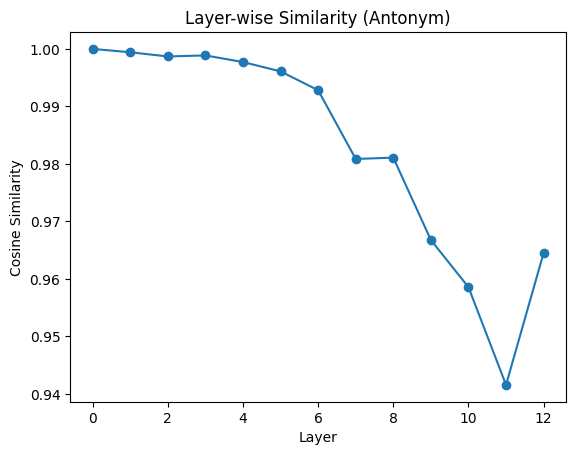

In [38]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(13), antonym_mean, marker='o')
plt.xlabel("Layer")
plt.ylabel("Cosine Similarity")
plt.title("Layer-wise Similarity (Antonym)")
plt.show()

In [53]:
pair["sentence1"] = pair["sentence1"].strip()
pair["sentence2"] = pair["sentence2"].strip()